#### Intervalos de confinça

- introdução:

Exemplo 1:

Intervalo de confiança para distribuição Normal com variância desconhecida

1) O tempo de reação de um novo medicamento pode ser considerado como tendo distribuição Normal e deseja-se fazer inferência sobre a média que é desconhecida obtendo um intervalo de confiança. Vinte pacientes foram sorteados e tiveram seu tempo de reação anotado. Os dados foram os seguintes (em minutos):



| 2.9 | 3.4 | 3.5 | 4.1 | 4.6 | 4.7 | 4.5 | 3.8 | 5.3 | 4.9 |
|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|
| 4.8 | 5.7 | 5.8 | 5.0 | 3.4 | 5.9 | 6.3 | 4.6 | 5.5 | 6.2 |

In [33]:
# Dados da tebela
valores = [
    2.9, 3.4, 3.5, 4.1, 4.6, 4.7, 4.5, 3.8, 5.3, 4.9,
    4.8, 5.7, 5.8, 5.0, 3.4, 5.9, 6.3, 4.6, 5.5, 6.2
]


Sabemos que o intervalo de confiança para normal com a variância desconhecida é dado por:

$$
(\bar{x}-T_{t}\sqrt{\frac{S^2}{n}};\bar{x}+T_{t}\sqrt{\frac{S^2}{n}})
$$

onde tt é o quantil de ordem 1 - α∕2 da distribuição t de Student, com n - 1 graus de liberdade.

In [34]:
# Importando bibliotecas necessárias
from scipy.stats import t                  # Distribuição t de Student para calcular os quantis
import statistics as est                   # Biblioteca para média e variância
import math                                # Biblioteca matemática para raiz quadrada

# Função para calcular o intervalo de confiança usando distribuição t de Student
def IC_t(X = None, conf = 0.95):
    n = len(X)                             # Tamanho da amostra
    media = est.mean(X)                    # Média da amostra
    variancia = est.variance(X)            # Variância amostral (corrigida por padrão)
    
    # Cálculo dos quantis da t de Student (inferior e superior)
    quantis = [
        t.ppf((1 - conf)/2, df = n - 1),           # Quantil inferior
        t.ppf((1 - (1 - conf)/2), df = n - 1)      # Quantil superior
    ]
    
    # Cálculo do intervalo de confiança
    # fórmula: média ± t * (desvio padrão / √n)
    ic = (
        round(media + quantis[0]*math.sqrt(variancia/n), 6),   # Limite inferior
        round(media + quantis[1]*math.sqrt(variancia/n), 6)    # Limite superior
    )
    
    return ic  # Retorna o intervalo de confiança como uma tupla



In [38]:
# intervalo de confiança padrão(95%):
IC_t(valores)

(4.278843, 5.211157)

In [39]:
# intervalo de confiança de 99%
IC_t(valores, 0.99)

(4.107814, 5.382186)

### Intervalos de confiança e função de verossimilhaça

Os dados abaixo são uma amostra aleatória da distribuição Bernoulli(p).

0 0 0 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1

a) o gráfico da função de verossimilhança para p com base nestes dados

In [43]:
# dados 
amostra_bernoulli = (0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1)

In [117]:
# Importando bibliotecas
import matplotlib.pyplot as plt           # Para geração de gráficos
from scipy.stats import binom             # Distribuição binomial
import numpy as np                        # Para manipulação de arrays e números

# Função auxiliar que retorna uma lista de 1 até a soma dos dados - 1 (pouco útil nesse caso)
def Contador(dados):
    return [i for i in range(1, sum(dados))]  # Retorna uma sequência de inteiros

# Função para construir o gráfico de verossimilhança da distribuição binomial
def plot(dados):
    p_vals = np.arange(0, 1, 0.01, dtype=float)  # Sequência de valores de p de 0 a 1 com passo de 0.01
    resultados = []                              # Lista para armazenar os log-verossimilhanças

    for p in p_vals:
        # Calcula a log-verossimilhança para cada valor de p com base nos dados
        resultados.append(binom.logpmf(sum(dados), len(dados), p))

    # Plota o gráfico da função de log-verossimilhança
    plt.plot(p_vals, resultados)
    plt.xlabel("p (probabilidade de sucesso)")
    plt.ylabel("Log-Verossimilhança")
    plt.title("Gráfico de Verossimilhança - Distribuição Binomial")
    plt.grid(True)
    plt.show()


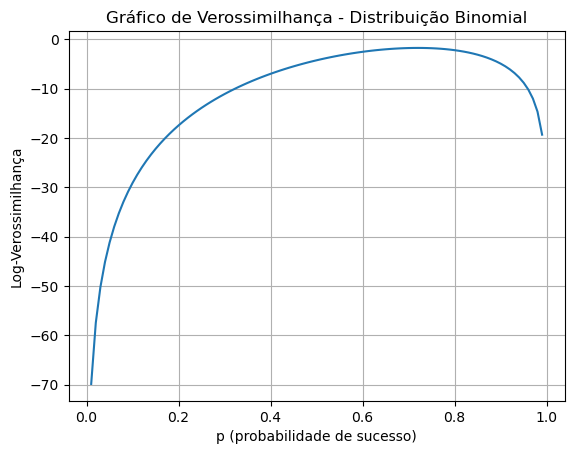

In [118]:
plot(amostra_bernoulli)

Intervalo de confinça para média:


$
P(\bar{X} - 1,96\sigma_{\bar{X}} \leq \mu \leq \bar{X} + 1,96\sigma_{\bar{X}}) = 0,95
$

Exemplo 11.13. Uma máquina enche pacotes de café com uma variância igual a 100 $g^2$. Ela estava regulada para 
encher os pacotes com 500 g, em média. Agora, ela se desregulou, e queremos saber qual a nova média $\mu$.
Uma amostra de 25 pacotes apresentou uma média igual a 485 g. Vamos construir um intervalo de confiança 

$IC(\mu;0,95) = 485 \bar{+} 1,96*2$

temos que $\sigma_{\bar{X}}$ = $\sigma/\sqrt{n} = 10/5 = 2g$

In [36]:
# construindo função:
import math

def IC(media,n,varianca):
    e = math.sqrt(varianca)/math.sqrt(n)
    Limite_inferior = media - 1.96*e
    Limite_superior = media + 1.96*e
    return (Limite_inferior,Limite_superior)

In [37]:
IC(485,25,100)

(481.08, 488.92)